<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/lab2_gsom_Galiutina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 2

**Поздравляем!** 

После успешной сдачи предыдущего проекта Вам стали доверять более сложные задачи.

Вы познакомились с модулем [pandas](https://github.com/dm-fedorov/pandas_basic/tree/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas), поэтому руководство компании поставило перед Вами несколько новых задач по анализу данных с помощью данного модуля.

### Задание 1

Заказчик попросил провести анализ частоты запросов к сайту по версии [Яндекс.Метрики](https://yandex.ru/support/metrica/general/glossary.html):

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat-q.csv"

df = pd.read_csv(url)
df.head()


,Поисковая фраза,Поисковая система,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте
0,Итого и средние,NaN,72394,57803,0.120328,1.298934,00:01:18
1,pycode.ru,Яндекс,2068,1225,0.093810,1.674565,00:01:38
2,холопов алексей васильевич,Яндекс,1240,467,0.082258,1.941129,00:03:53
3,золотое правило дидактики,Яндекс,778,751,0.082262,1.087404,00:00:41
4,золотое правило дидактики я.а коменского,Яндекс,743,724,0.068641,1.044415,00:00:31


**Задача 1.1**: определите статистику встречаемости отдельных слов в поисковых фразах. Это позволит понять тематику данного сайта и настроить показ рекламы.

По условию задачи исходный файл с данными модифицировать нельзя.

За помощью обратитетесь к [инструкции](https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/10.%20%D0%9A%D0%B0%D0%BA%20%D0%BC%D0%B0%D0%BD%D0%B8%D0%BF%D1%83%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%3F.ipynb) и возможностям модуля [pymorphy2](https://github.com/dm-fedorov/python_basic/blob/master/pymorphy2.ipynb).

**при работе над первым заданием вдохновлялась кодом из статьи: https://habr.com/ru/post/442626/
Код и новые термины, которые там встретились, были подробно мной изучены.

1. Уберём все лишние символы из текстовых данных

In [3]:
def unicode2str(s):
    try:
        return s.replace(u'\u2014', u'-').replace(u'\u2013', u'-').replace(u'\u2026', u'...')
    except:
        return s
titles = df["Поисковая фраза"].map(unicode2str, na_action=None)
titles

0                                          Итого и средние
1                                                pycode.ru
2                               холопов алексей васильевич
3                                золотое правило дидактики
4                 золотое правило дидактики я.а коменского
                               ...                        
33784     тезисы доклада в сборнике конференции на тем...
33785     структурированные тезисы (введение, цель, ма...
33786     в чем проявляются различия между «прикладной...
33787       преимущества метода кейс-стади (метод кейсов)
33788    ﻿понятие безопасности в классической и совреме...
Name: Поисковая фраза, Length: 33789, dtype: object

In [0]:
2. Отделим рускоязычные запросы от прочих при помощи кодировки ascii

In [0]:
def to_ascii(s):
    try:
        s = s.replace("'", '').replace("-", '').replace("|", '')
        return s.decode('utf-8').encode("ascii", errors="ignore").decode()
    except:
        return ''

def is_asciiword(s):
    ascii_word = to_ascii(s)
    return len(ascii_word) > 2

3. Нормализуем вид англоязычных запросов

In [0]:
def normal_eng(s):
    for sym in ("'s", '{', '}', "'", '"', '}', ';', '.', ',', '[', ']', '(', ')', '-', '/', '\\'):
        s = s.replace(sym, ' ')
    return s.lower().strip()

4. Работаем с запросами на русском языке. Проверяем слово на часть речи и с помощью модуля выводим его нормализовынную форму. 

In [6]:
!pip3 install pymorphy2
!pip3 install pymorphy2-dicts
!pip3 install DAWG-Python
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        if 'NOUN' in r.tag:
            return r.normal_form
    return None

     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 7.1MB 13.6MB/s 


5. Соединим созданный код. Сначала проверяем английские слова, затем русские 
Получим словарь из ста наиболее часто встречающихся запросов.

In [7]:
from collections import Counter

c_dict = Counter()
for s in titles.values:
    for w in s.split():
        if is_asciiword(w):
             # English word or digit
             n = normal_eng(w)
             c_dict[n] += 1
        else:
             # Russian word
             n = normal_rus(w)
             if n is not None:
                c_dict[n] += 1
#c_dict
common = c_dict.most_common(100)
common


[('тезис', 6848),
 ('век', 5995),
 ('конференция', 4726),
 ('работа', 3345),
 ('исполняющий', 3083),
 ('пример', 2991),
 ('безопасность', 2721),
 ('кандидат', 2522),
 ('правило', 1906),
 ('практика', 1829),
 ('доклад', 1586),
 ('статья', 1464),
 ('отчёт', 1344),
 ('дидактика', 1148),
 ('кейс', 1125),
 ('студент', 1047),
 ('выступление', 1005),
 ('секунда', 965),
 ('коменский', 964),
 ('человек', 920),
 ('тема', 877),
 ('принцип', 857),
 ('исследование', 823),
 ('обучение', 762),
 ('анализ', 750),
 ('задание', 725),
 ('написание', 721),
 ('метод', 696),
 ('сухомлинский', 694),
 ('образец', 673),
 ('область', 661),
 ('образование', 643),
 ('информация', 634),
 ('текст', 619),
 ('защита', 574),
 ('проблема', 564),
 ('иза', 540),
 ('золотой', 539),
 ('данные', 537),
 ('манипуляция', 526),
 ('лекция', 525),
 ('структура', 516),
 ('технология', 500),
 ('цитата', 460),
 ('программирование', 457),
 ('ли', 455),
 ('язык', 453),
 ('система', 449),
 ('холоп', 435),
 ('книга', 412),
 ('этика', 404

6. Визуализируем полученный словарь:

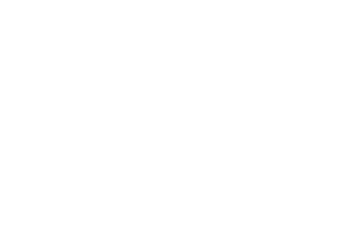

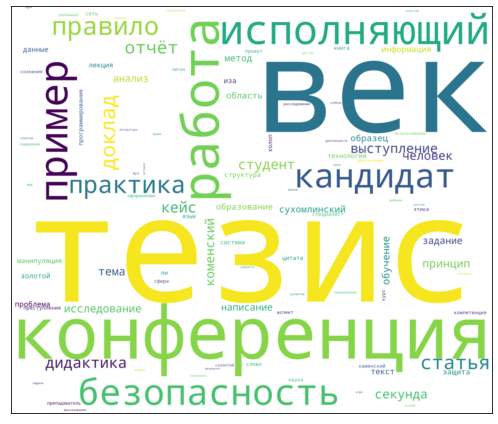

In [8]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
common = c_dict.most_common(100)
wc = WordCloud(width=2600, height=2200, background_color="white", relative_scaling=1.0,
               collocations=False, min_font_size=10).generate_from_frequencies(dict(common))
plt.axis("off")
plt.figure(figsize=(9, 6))
plt.imshow(wc, interpolation="bilinear")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
 
plt.show()

### Задание 2

Заказчик попросил провести анализ поведения пользователей на сайте по версии [Яндекс.Метрики](https://yandex.ru/support/metrica/general/glossary.html):

In [9]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat.csv"

df = pd.read_csv(url1)
df = df.drop([0])
df.head()


,Интервал дат визита,Визиты,Посетители,Просмотры,Доля новых посетителей,Отказы,Глубина просмотра,Время на сайте
1,2020-03-08,49,46,55,0.565217,0.244898,1.122449,00:00:52
2,2020-03-07,152,137,198,0.846715,0.118421,1.302632,00:01:15
3,2020-03-06,172,160,209,0.812500,0.203488,1.215116,00:01:23
4,2020-03-05,208,199,266,0.859296,0.125000,1.278846,00:01:07
5,2020-03-04,242,221,307,0.809955,0.194215,1.268595,00:01:00


**Задача 2.1**: определите, каким образом менялось поведение пользователей в зависимости от месяца и года. Постройте графики.

По условию задачи исходный файл с данными модифицировать нельзя.

За помощью обратитесь к [инструкции](https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/09.%20%D0%9A%D0%B0%D0%BA%20%D0%BB%D0%B5%D0%B3%D0%BA%D0%BE%20%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%B0%D1%82%D1%8B%D0%B2%D0%B0%D1%82%D1%8C%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%3F.ipynb).

1. Переведём данные столбца в формат datetime.

In [10]:
df["Интервал дат визита"] = pd.to_datetime(df["Интервал дат визита"])

df["Интервал дат визита"]


1      2020-03-08
2      2020-03-07
3      2020-03-06
4      2020-03-05
5      2020-03-04
          ...    
1093   2017-03-12
1094   2017-03-11
1095   2017-03-10
1096   2017-03-09
1097   2017-03-08
Name: Интервал дат визита, Length: 1097, dtype: datetime64[ns]

Создадим новый датафрэйм, в котором будут содержаться средние значения по всем столбцам. Перегруппируем временной период на месяца. 
Получили средние показатели для каждого месяца.

In [11]:
df = df.resample('M', on="Интервал дат визита").mean()
df

,Визиты,Посетители,Просмотры,Доля новых посетителей,Отказы,Глубина просмотра
Интервал дат визита,,,,,,
2017-03-31,530.333333,468.708333,751.375000,0.775001,0.134870,1.420962
2017-04-30,495.833333,436.733333,720.266667,0.776997,0.143677,1.457894
2017-05-31,434.516129,388.161290,641.258065,0.784017,0.165197,1.470824
2017-06-30,355.000000,321.633333,582.100000,0.791094,0.166214,1.610060
2017-07-31,209.451613,184.580645,361.677419,0.728195,0.158247,1.704932
2017-08-31,190.258065,160.741935,304.000000,0.674667,0.145575,1.595236
2017-09-30,321.066667,282.100000,507.666667,0.766718,0.147984,1.584445
2017-10-31,305.096774,271.935484,434.903226,0.786926,0.165850,1.427438
2017-11-30,311.333333,272.566667,434.800000,0.727672,0.151171,1.417022


Text(0, 0.5, 'Средний показатель кол - ва раз')

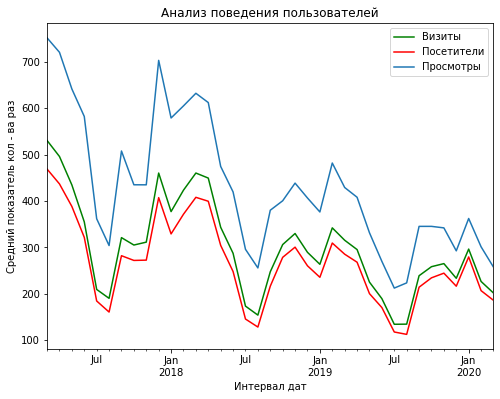

In [14]:

mf = df[['Визиты', 'Посетители', 'Просмотры']]
pf = df[['Доля новых посетителей',	'Отказы',	'Глубина просмотра']]
mf.plot(figsize=(8, 6), label = 'анализ поведения пользователей',style=['g', '#FF0000'])
plt.title('Анализ поведения пользователей')
plt.xlabel('Интервал дат')
plt.ylabel('Средний показатель кол - ва раз')


Text(0, 0.5, 'Средний показатель')

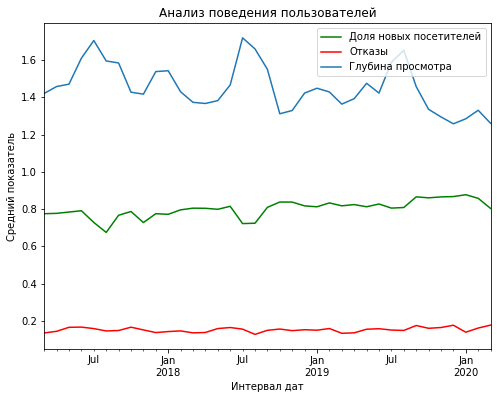

In [15]:
pf.plot(figsize=(8, 6), label = 'анализ поведения пользователей',style=['g', '#FF0000'])
plt.title('Анализ поведения пользователей')
plt.xlabel('Интервал дат')
plt.ylabel('Средний показатель')

### Задание 3

В этом задании Вам предстоит выполнить роль аналитика данных в области образования.

Заказчик (руководство вуза) предоставил обезличенные данные с баллами ЕГЭ студентов (`stud_spisok_ege.csv`) и сведения о баллах за контрольные работы (`stud_spisok_ball.csv`).

Анализ этих данных позволит руководству вуза принимать обоснованные решения по повышению качества процесса обучения и выстраивать персональные образовательные маршруты (построить рекомендательную систему на основе искусственного интеллекта).

По условию задания исходные файлы с данными модифицировать нельзя.

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ege.csv"

pf = pd.read_csv(url, sep=';')
pf.head()

,stud_kod,predmet_name,ball,year,svid_status
0,50095,Русский язык,76,2013,Действительно
1,50095,Английский язык,94,2013,Действительно
2,50095,Математика,56,2013,Действительно
3,50095,Обществознание,70,2013,Действительно
4,50104,Русский язык,72,2013,Действительно


- `stud_kod` - идентификатор студента
- `predmet_name` - имя предмета
- `ball` - балл
- `year` - год сдачи
- `svid_status` - статус свидетельства о сдаче ЕГЭ

In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ball.csv"

nf = pd.read_csv(url, sep=';')
nf.head()

,stud_kod,uch_plan_kod,predmet_name,ball,ts,cd_nomer,semestr,cd_type_name,uch_plan_punkt_kod
0,8,1,История,25,25-дек-11,1,1,Эссе,255
1,8,1,История,30,25-дек-11,2,1,Презентация,255
2,8,1,История,45,NaN,3,1,Аналитическая работа,255
3,8,1,Философия,15,30-апр-15,2,1,Реферат,293
4,8,1,Философия,18,30-апр-15,1,1,Аналитическая работа,293


- `stud_kod` - идентификатор студента 
- `uch_plan_kod` - внутренний код учебного плана
- `predmet_name` - имя дисциплины по учебному плану
- `ball` - балл за контрольную работу
- `ts` - время, когда оценка внесена в систему
- `cd_nomer` - номер контрольной работы, если их несколько за семестр
- `semestr` - семестр
- `cd_type_name` - вид контрольной работы
- `uch_plan_punkt_kod` - идентификатор учебного плана

**Задача 3.1**: определите, всего сколько студентов представлено в наборе данных.

In [21]:
print('Колв-во абитуриентов, сдававших ЕГЭ:')
pf['stud_kod'].nunique()


Колв-во абитуриентов, сдававших ЕГЭ:


3001

In [22]:
print('Колв-во студентов университета:')
nf['stud_kod'].nunique()

Колв-во студентов университета:


285

In [24]:
suma = pf['stud_kod'].nunique() + nf['stud_kod'].nunique()
print('Всего в наборе данных представлено', suma, 'студентов')


Всего в наборе данных представлено 3286 студентов


**Задача 3.2**: определите по данным ЕГЭ те предметы, которые чаще всего сдают абитуренты в этом вузе. 

In [25]:
pf['predmet_name'].value_counts()

Математика                  3049
Русский язык                3045
Обществознание              3033
Сочинение                   1303
Английский язык              973
История                      348
Физика                       170
Информатика и ИКТ             83
Биология                      61
Литература                    60
География                     39
Химия                         29
Немецкий язык                 28
Французский язык              11
Английский язык (устный)       6
Немецкий язык (устный)         1
Name: predmet_name, dtype: int64

In [26]:
kr = pf['predmet_name'].value_counts()
print('Топ - 5 предметов ЕГЭ, которые чаще всего сдают абитуренты в этом вузе: ')
kr.head()

Топ - 5 предметов ЕГЭ, которые чаще всего сдают абитуренты в этом вузе: 


Математика         3049
Русский язык       3045
Обществознание     3033
Сочинение          1303
Английский язык     973
Name: predmet_name, dtype: int64

**Задача 3.3**: определите средние, минимальные и максимальные баллы ЕГЭ по отдельным предметам.

In [27]:
lf = pf
lf = lf.pivot_table(values="ball", index="stud_kod",
                        columns="predmet_name", aggfunc="max",
                        margins=True, margins_name = 'Max')
lf.tail(1)



predmet_name,Английский язык,Английский язык (устный),Биология,География,Информатика и ИКТ,История,Литература,Математика,Немецкий язык,Немецкий язык (устный),Обществознание,Русский язык,Сочинение,Физика,Французский язык,Химия,Max
stud_kod,,,,,,,,,,,,,,,,,
Max,100.0,0.0,93.0,85.0,94.0,100.0,87.0,100.0,90.0,0.0,100.0,100.0,1.0,96.0,92.0,98.0,100


Найдём минимальные значения ЕГЭ, исключая нулевые значения.

In [28]:
import numpy as np
lf = pf
lf = lf.replace(0, np.NaN)
lf = lf.pivot_table(values="ball", index="stud_kod",
                        columns="predmet_name", aggfunc="min",
                        margins=True, margins_name = 'Min')
lf.tail(1)


predmet_name,Английский язык,Биология,География,Информатика и ИКТ,История,Литература,Математика,Немецкий язык,Обществознание,Русский язык,Сочинение,Физика,Французский язык,Химия,Min
stud_kod,,,,,,,,,,,,,,,
Min,22.0,36.0,37.0,35.0,32.0,35.0,20.0,23.0,40.0,37.0,1.0,27.0,44.0,36.0,1.0


In [29]:
lf = pf
lf = lf.replace(0, np.NaN)
lf = lf.pivot_table(values="ball", index="stud_kod",
                        columns="predmet_name", aggfunc="mean",
                        margins=True, margins_name = 'Mean')
lf.tail(1)

predmet_name,Английский язык,Биология,География,Информатика и ИКТ,История,Литература,Математика,Немецкий язык,Обществознание,Русский язык,Сочинение,Физика,Французский язык,Химия,Mean
stud_kod,,,,,,,,,,,,,,,
Mean,70.383661,58.431034,64.333333,65.64557,62.834337,64.355932,64.516331,66.285714,71.524439,79.186987,1.0,56.447205,71.636364,61.346154,63.431884


**Задача 3.4**: определите годы с максимальными и минимальными показателями ЕГЭ.

Вывели максимальное и минимальное для каждого года
(?) как вывести только один год с мин\макс за всё время

In [30]:
mean_ball = pf.groupby("year")["ball"].mean()
min_ball= mean_ball.min()
max_ball= mean_ball.max()

dict1 = dict(zip(mean_ball.values,mean_ball.index))

print("Наименьший средний показатель, равный", round(min_ball), 'баллов был зафиксирован в', dict1[min_ball], 'году.' )

print("Наибольший средний показатель, равный", round(max_ball), 'баллов был зафиксирован в', dict1[max_ball], 'году.' )



Наименьший средний показатель, равный 31 баллов был зафиксирован в 2009 году.
Наибольший средний показатель, равный 71 баллов был зафиксирован в 2013 году.


**Задача 3.5**: определите наиболее часто встречающийся вид контрольной работы в вузе.

In [31]:

km = nf['cd_type_name'].value_counts()
print('Топ - 5 наиболее часто встречающихся видов кр в вузе: ')
km.head()

Топ - 5 наиболее часто встречающихся видов кр в вузе: 


Контрольная работа      20104
Текущий контроль        10105
Экзамен                  8848
Тест                     7791
Аналитическая работа     3061
Name: cd_type_name, dtype: int64

**Задача 3.6**: определите дисциплину(ы), вызвавшую наибольшие сложности у студентов. 

Это позволит усилить подготовку по данным дисциплинам через внедрение факультативных занятий. 

Создадим новый датафрэйм и поместим туда название дисциплины и балл студента. Уберём пустые значения

In [33]:
import numpy as np

bf6 = (nf.dropna()).loc[:,["predmet_name", "ball"]].copy()
bf6["ball"] = bf6["ball"].apply(np.vectorize(lambda a: float(a.replace(",", "."))))
bf6

,predmet_name,ball
0,История,25.0
1,История,30.0
3,Философия,15.0
4,Философия,18.0
5,Философия,21.6
...,...,...
65529,Бухгалтерский учет,16.0
65530,Бухгалтерский учет,22.0
65531,Менеджмент,7.0
65532,Менеджмент,12.0


In [34]:
ball_mean = bf6.groupby("predmet_name")["ball"].mean()
print('Топ - 10 дисциплин, вызвавших наибольшие сложности у студентов:')
ball_mean.sort_values(ascending=True).head(10)


Топ - 10 дисциплин, вызвавших наибольшие сложности у студентов:


predmet_name
Иностранный язык профессиональный                            9.126786
Демография и статистика населения                           11.822222
Экономическая теория                                        12.004232
Линейная алгебра                                            12.201326
Учетно-аналитическое обеспечение управления организацией    12.740000
Макроэкономическое планирование и прогнозирование           12.785714
Государственное регулирование экономики                     12.925000
Региональная политика государства                           13.333333
Инновационная политика государства                          13.333333
Деньги, кредит, банки                                       13.716535
Name: ball, dtype: float64

**Задача 3.7**: определите отстающих студентов (претендентов на отчисление). 

Создадим новый датафрэйм и поместим туда название дисциплины и балл студента. Уберём пустые значения, переведём переменные ['ball'] в формат float

In [35]:
bf7 = (nf.dropna()).loc[:,["stud_kod", "ball"]].copy()
bf7["ball"] = bf7["ball"].apply(np.vectorize(lambda a: float(a.replace(",", "."))))
bf7

,stud_kod,ball
0,8,25.0
1,8,30.0
3,8,15.0
4,8,18.0
5,8,21.6
...,...,...
65529,2682,16.0
65530,2682,22.0
65531,2682,7.0
65532,2682,12.0


In [36]:
ball_mean_1 = bf7.groupby("stud_kod")["ball"].mean()
#ball_mean_1
print('10 наиболее отстающих студентов:')
ball_mean_1.sort_values(ascending=True).head(10)

10 наиболее отстающих студентов:


stud_kod
1335    12.786595
776     14.235374
2653    14.317195
1704    14.635017
1758    14.774286
1610    14.966336
218     15.205495
715     15.252803
1662    15.330256
1683    15.340793
Name: ball, dtype: float64

**Задача 3.8**: определите семестр и год, наиболее сложные для отдельных (выбранных) студентов. 

In [0]:
Выберем 10 случайных студентов (индекс 10 - 20). Удалим пустые значения.

In [41]:
kod = (nf["stud_kod"].unique())[10:20]
bf8 = (nf.dropna()).loc[nf["stud_kod"].isin(kod), ["stud_kod","ball", "ts", "semestr"]].copy()
bf8 = bf8.dropna()
bf8


,stud_kod,ball,ts,semestr
2334,100,23.0,19-нояб-11,1
2335,100,24.0,19-нояб-11,1
2336,100,45.0,25-дек-11,1
2337,100,16.8,30-апр-15,1
2338,100,15.0,30-апр-15,1
...,...,...,...,...
4687,165,60.0,08-апр-15,8
4688,165,29.0,13-март-15,8
4689,165,29.0,27-март-15,8
4690,165,29.0,03-апр-15,8


Поскольку формат столбца ['ts'] невозможно перевести в dataframe, для определения года создадим новую переменную, в которой будет содержаться год и семестр - ['data'].

In [42]:
kod = (nf["stud_kod"].unique())[10:20]
bf8 = (nf.dropna()).loc[nf["stud_kod"].isin(kod), ["stud_kod","ball", "ts", "semestr"]].copy()
bf8 = bf8.dropna()
bf8["ts"] = bf8["ts"].apply(np.vectorize(lambda a: a.split("-")[2]))
bf8["data"] = bf8["ts"].apply(str) + ":" + bf8["semestr"].apply(str)
bf8

for i in kod:
    mn = (bf8.loc[bf8["stud_kod"] == i]).groupby('data')["stud_kod","ball"].mean()
    mn = mn.loc[mn["ball"] == mn["ball"].min(), ["ball"]]
    data = mn.index[0].split(":")
    print('Студент', i, 'заработал самый низкий средний балл', round(mn.values[0][0],2), 'в', data[1], 'семестре обучения в 20', data[0], 'году')

Студент 100 заработал самый низкий средний балл 14.57 в 2 семестре обучения в 20 15 году
Студент 103 заработал самый низкий средний балл 15.6 в 7 семестре обучения в 20 15 году
Студент 104 заработал самый низкий средний балл 10.7 в 4 семестре обучения в 20 13 году
Студент 119 заработал самый низкий средний балл 15.34 в 2 семестре обучения в 20 15 году
Студент 140 заработал самый низкий средний балл 12.12 в 2 семестре обучения в 20 13 году
Студент 142 заработал самый низкий средний балл 15.12 в 2 семестре обучения в 20 15 году
Студент 144 заработал самый низкий средний балл 13.44 в 2 семестре обучения в 20 15 году
Студент 154 заработал самый низкий средний балл 14.45 в 2 семестре обучения в 20 15 году
Студент 164 заработал самый низкий средний балл 16.33 в 2 семестре обучения в 20 15 году
Студент 165 заработал самый низкий средний балл 13.52 в 2 семестре обучения в 20 15 году


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


**Задача 3.9**: определите, можно ли провести анализ интересов отдельных (выбранных) студентов, исходя из баллов по контрольным работам. 

Эта информация позволит в будущем рекомендовать студентам подходящие магистерские программы.

In [43]:
gr = nf[(nf.stud_kod == 8)&(nf.cd_type_name == 'Контрольная работа')]
d = gr.groupby(["predmet_name"])["ball"].mean().sort_values(ascending=False).head()
print('Топ - 5 наиболее интересных предметов для студента:', d)

Топ - 5 наиболее интересных предметов для студента: predmet_name
Безопасность жизнедеятельности                     40.0
Правовое обеспечение хозяйственной деятельности    38.0
Право                                              36.0
Теория рисков                                      33.0
Оценка стоимости бизнеса                           28.5
Name: ball, dtype: float64


**Задача 3.10**: Предложите решение, каким образом по представленным данным отследить динамику успеваемости отдельных (выбранных) студентов?

Предлагаю вывести средний балл студента для каждого семестра. Наглядно видно, в каком сесмечтре студент учился старательнее.

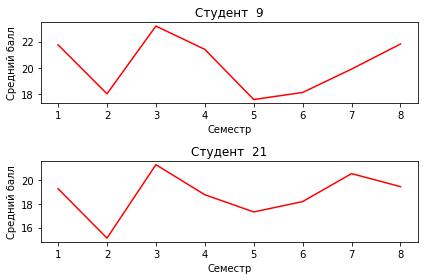

In [46]:
import matplotlib.pyplot as plt

kod = (nf["stud_kod"].unique())[1:3]
bf8 = (nf.dropna()).loc[nf["stud_kod"].isin(kod), ["stud_kod","ball", "semestr"]].copy()
bf8 = bf8.dropna()
bf8

fig, ax = plt.subplots(2)
i = 0

for m in kod:
    k = bf8.loc[bf8["stud_kod"] == m].groupby("semestr")["ball"].mean()
    ax[i].plot(k.index, k.values, color="red")
    ax[i].set_title("Студент  " + str(m))
    ax[i].set_xlabel("Семестр")
    ax[i].set_ylabel("Средний балл")
    i+=1
plt.tight_layout()
plt.show()


### Формальные требования:
- представлены в формулировках заданий 
- нарушение сроков - -3 балла
- за работу выставляется от 0 до 35 баллов
- за решение *задания 1* - **5 баллов**, *задания 2* - **10 баллов**, *задания 3* - **20 баллов**.